# Modelos de empleo restringuido por la demanda efectiva

Se desarrollan algunos modelos de empleo restringuido por la demanda efectiva desarrollado por Lavoie (2014) y Lavoie (2001).

# Librerías

Se necesitan las siguientes dos librerías

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Modelo Z-D

Se asume que la economía es cerrada, no existe gobierno y verticalizada. Además, se asume que los asalariados no ahorran: gastan todos sus ingresos en consumo. Por otra parte, los ${animal spirits}$ de los capitalistas guían sus decisiones de inversión. Sea la función de utilización

$ Y = bN  $

y la función de fijación de precios 

$ p = (1 + \theta) \frac{w}{b}  $

donde $Y$ es la producción, $b$ es la productividad, $N$ es la cantidad de trabajo, $p$ es el precio unitario, $\theta$ es el mark-up sobre los costos y $w$ es el salario nominal. De (1) y (2), se deriva la función de oferta agregada:

$ Z = pY$

donde $Z$ es la oferta agregada. (3) se puede reexpresar de la siguiente manera.

$ Z = (1 + \theta) wN $

De la identidad contable del producto por el método del gasto para una economía cerrada, junto con los supuestos sobre el consumo y la inversión señalados arriba, se obtiene la siguiente función para la demanda agregada:

$ D = C + I  = wN + pa $

(4) se puede expresar de la siguiente manera.

$ D = wN + a(1 + \theta) \frac{w}{b} $

donde $D$ es la demanda agregada y $a$ es la inversión.



In [3]:
"MODELOS DE DEMANDA EFECTIVA Y EMPLEO"

"FUNCIONES"

# Función de oferta agregada en términos de salario 

def Z(θ, w, N):
    
    return (1 + θ)*w*N

# Función de demanda agregada en términos de salario 

def D(θ, b, a, w, N):
    
    return w*N + a*(1 + θ)*w/b

Los parámetros y variables exógenas deben cumplir las siguientes condiciones:

$ -\theta w < 0 $

$ a(1 + \theta) \frac{w}{b} > 0 $

In [4]:
"PARÁMETROS Y VARIABLES EXÓGENAS"

θ_0 = 0.6
b_0 = 0.2
a_0 = 0.6
w_0 = 0.5

In [5]:
"DEFINIENDO LAS FUNCIONES"

N_0 = np.arange(0, 15, 0.1)

Z_schedule = Z(θ_0, w_0, N_0) 

D_schedule = D(θ_0, b_0, a_0, w_0, N_0)

En equilibrio $ Z = D $. Los valores de equilibrio se pueden obtener de forma matricial:

$ Z =  (1 + \theta)wN $

$ D =  wN + a(1 + \theta)\frac{w}{b} $

Ordenando 

$Z - (1 + \theta)wN = 0 $

$D -  wN = a(1 + \theta)\frac{w}{b} $

Y se construyen las siguientes matrices

$AX = B$

donde
$A=
\begin{pmatrix}
1 & -(1 + \theta)w \\
1 & -w \\
\end{pmatrix}$, $B=
\begin{pmatrix}
0 \\
a(1 + \theta)\frac{w}{b} \\
\end{pmatrix}$, $X=
\begin{pmatrix}
Z \\
N \\
\end{pmatrix}$

Si la matriz $A$ tiene inversa, $A^{-1}$, entonces al premultiplicar a ambos lados por $A^{-1}$ se obtiene la solución:

$X = A^{-1}B$

In [6]:
"EQUILIBRIO"

A = np.array([[1, -(1 + θ_0)*w_0],
              [1, -w_0]])

B = np.array([0, a_0*(1 + θ_0)*w_0/b_0])


A_inv      = np.linalg.inv(A)


Z_eq, N_eq = np.dot(A_inv, B)

Graficando las funciones y el equilibrio

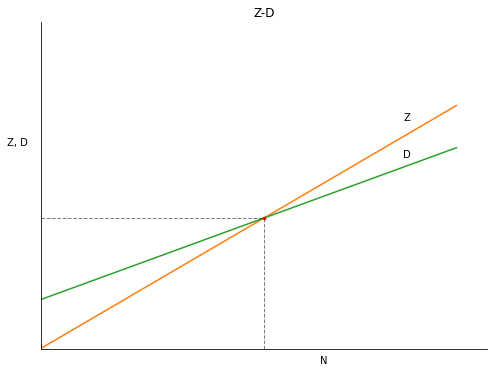

In [7]:
"GRAFICANDO"

xmin, xmax, ymin, ymax = 0, 16, 0, 16

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(N_0, Z_schedule, color= "C01")
ax.plot(N_0, D_schedule, color= "C02")
ax.plot(N_eq, Z_eq, color = "red", marker = ".", markersize = 5, markeredgecolor = "red")
ax.plot([N_eq, N_eq], [0, Z_eq],   c = "black", ls = "--", lw = 1, alpha = 0.5)
ax.plot([0, N_eq], [Z_eq , Z_eq ], c = "black", ls = "--", lw = 1, alpha = 0.5)
ax.text(N_0[-20], Z_schedule[-10], "Z")
ax.text(N_0[-20], D_schedule[-10], "D")
ax.text(10, -0.7, "N")
ax.text(-1.2, 10, "Z, D")
ax.set_title("Z-D")
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

De acuerdo con Keynes (1936):

    Si la 
    
En ese sentido, si aumentan salarios nominales en determinada propoción, los precios aumentarán en la misma propoción; por tanto, el nivel de empleo no variará.

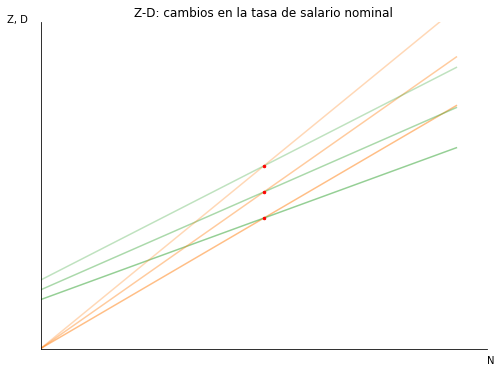

In [8]:
"CAMBIOS EN LA TASA DE SALARIO NOMINAL"

w_shocks = (0.5, 0.6, 0.7)  

fig, ax = plt.subplots(figsize=(8, 6))

for i in w_shocks:
    A_i = np.array([[1, -(1 + θ_0)*i],
                    [1, -i]])
    
    B_i = np.array([0, a_0*(1 + θ_0)*i/b_0])
    
    A_inv_i        = np.linalg.inv(A_i)
    
    Z_eq_i, N_eq_i = np.dot(A_inv_i, B_i)
    
    Z_shocks = Z(θ_0, i, N_0) 
    D_shocks = D(θ_0, b_0, a_0, i, N_0)
    ax.plot(N_0, Z_shocks, color  = "C01", alpha  = 1-i)
    ax.plot(N_0, D_shocks, color  = "C02", alpha  = 1-i)
    ax.plot(N_eq_i, Z_eq_i, color = "red", marker = ".", markersize = 5, markeredgecolor = "red")

ax.set_title("Z-D: cambios en la tasa de salario nominal")
ax.text(16, -0.7, "N")
ax.text(-1.2, 16, "Z, D")
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show() 

# Modelo de empleo I

Nuevamente, de las funciones de oferta agregada, $Z$, y de demanda agregada, $D$:

$ Z = pY = pbN $

$ D = wN + ap  $

A diferencia del modelo $Z-D$, en este caso en las funciones $Z$ y $D$  se vuelve explícito las variables precio y salario nominal, con el fin de definir la variable salario real como se verá a continuación. En equilibrio $ Z = D $: 

$ pbN = wN + ap $

diviendo entre $p$ y reordeando, se deriva la función de salario real restringuido por la demanda efectiva

$ \omega_{(N)} = b - \frac{a}{N} $

donde $\omega = \frac{w}{p}$ es el salario real. Una función útil para los cálculos siguientes es la función inversa de (). 

$ \omega_{(N)} ^{-1} = N_{(\omega)} = \frac{a}{b-\omega} $

In [9]:
"MODELO DE EMPLEO I"

"FUNCIONES"

def model_1(a, b, N):
    
    return b - a/N

def inv_model_1(a, b, ω):
    
    return a/(b - ω)

Se eligen los siguientes parámetros y variables exógenas, cumpliendo la siguiente condición 

$ b - \omega > 0 $

En otras palabras, el salario real no tiene que superar la productividad.

In [10]:
"PARÁMETROS"

b_0 = 0.2
a_0 = 0.6
S_0 = 12
N_0 = np.arange(0.01, 15, 0.1)


In [11]:
"DEFINIENDO LA FUNCIÓN DEL MODELO 1"

m1_schedule = model_1(a_0, b_0, N_0)

La función de salario real restringuido por la demanda efectiva tiene dos variables endógenas: el salario real ($\omega$) y el nivel de empleo ($N$). Por tanto, existe un grado de libertad. Se puede fijar como variable exógena una de las dos variables endógenas para resolver el modelo. Si se fija el salario real, se obtiene el nivel de empleo. 


Además, note que, dado el nivel de productividad, al fijar salario real también se determina el mark-up sobre los costos y, a su vez, la participación de los salarios (y de los beneficios). De la función de fijación de precios:

$  \frac{\omega}{b} = \frac{1}{1 + \theta} =  \Omega  $ , $0 < \Omega < 1 $

donde $\Omega = \frac{1}{1 + \theta} $ es la participación de los salarios. 

In [12]:
"EQUILIBRIO: FIJANDO EL SALARIO REAL"

ω_exo = 0.12


N_exo = inv_model_1(a_0, b_0, ω_exo)

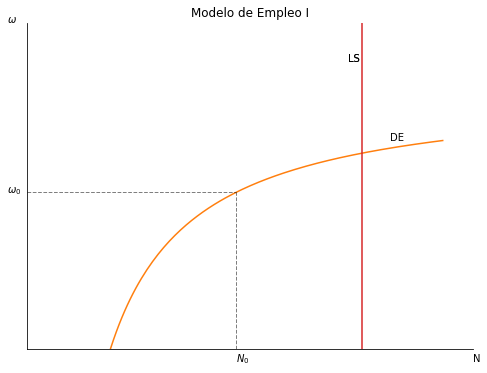

In [13]:
"GRAFICANDO"

xmin, xmax, ymin, ymax = 0, 16, 0, 0.25

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(N_0, m1_schedule, color = "C01")
ax.axvline(S_0, color = "C03")
ax.plot([N_exo, N_exo], [0, ω_exo],  c = "black", ls ='--', lw = 1, alpha = 0.5)
ax.plot([0, N_exo], [ω_exo , ω_exo], c = "black", ls ='--', lw = 1, alpha = 0.5)
ax.text(S_0 - 0.5, 0.22, "LS")
ax.text(N_0[-20], m1_schedule[-1], "DE")
ax.text(N_exo, -0.01, "$N_{0}$")
ax.text(-0.7, ω_exo, "$ω_{0}$")
ax.text(S_0 - 0.5, 0.22, "LS")
ax.text(16, -0.01, "N")
ax.text(-0.7, 0.25, "$ω$")
ax.set_title("Modelo de Empleo I")
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

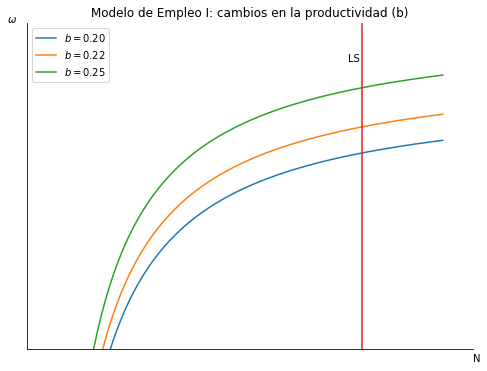

In [14]:
"Cambios en la productividad (b)"

b_shocks = (0.2, 0.22, 0.25)

xmin, xmax, ymin, ymax = 0, 16, 0, 0.25

fig, ax = plt.subplots(figsize = (8, 6))
for i in b_shocks:
    m1_b_shocks   = model_1(a_0, i, N_0)
    ax.plot(N_0, m1_b_shocks, label = r'$b=$'+f"{i:.2f}")
ax.axvline(S_0, color= "C03")
ax.text(S_0 - 0.5, 0.22, "LS")
ax.text(16, -0.01, "N")
ax.text(-0.7, 0.25, "$ω$")
ax.set_title("Modelo de Empleo I: cambios en la productividad (b)")
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.legend(loc = "upper left")
plt.show()

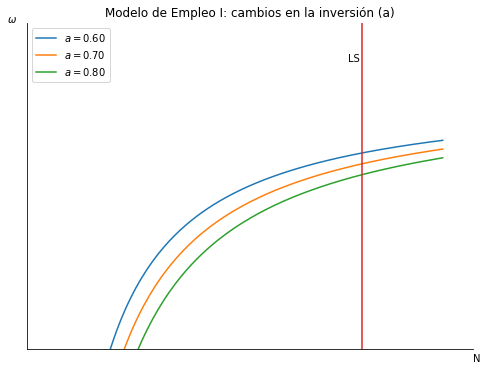

In [15]:
"Cambios en la inversión (a)"

a_shocks = (0.6, 0.7, 0.8)

xmin, xmax, ymin, ymax = 0, 16, 0, 0.25

fig, ax = plt.subplots(figsize = (8, 6))
for i in a_shocks:
    m1_a_shocks = model_1(i, b_0, N_0)
    ax.plot(N_0, m1_a_shocks, label = r'$a=$'+f"{i:.2f}")
ax.axvline(S_0, color = "C03")
ax.text(S_0 - 0.5, 0.22, "LS")
ax.text(16, -0.01, "N")
ax.text(-0.7, 0.25, "$ω$")
ax.set_title("Modelo de Empleo I: cambios en la inversión (a)")
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.legend(loc = "upper left")
plt.show()

# Modelo de empleo II

En este modelo se relaja el supuesto de que solo los asalariados consumen. Se considera que los capitalista también consumen: destinan un fracción de sus beneficios para el consumo.

$ D = w N + c_{r}(py- w N) + ap  $, $ 0< c_r < 1 $

donde $c_r$ es la propensión a consumir por parte los capitalistas. La función de oferta agregada es la misma. En equilibrio $ Z = D $: 

$ pbN = w N + c_r(py-w N) + ap $

diviendo entre $p$ y reordeando se obtiene la función de salario real restringuido por la demanda efectiva

$ \omega_{(N)} = b - \frac{a}{N(1 - c_{r})} $

Nuevamente, es útil obtener  la función inversa de (). 

$ \omega_{(N)} ^{-1} = N_{(\omega)} = \frac{a}{(b - \omega)(1 - c_{r})} $

In [16]:
"MODELO DE EMPLEO II"

"FUNCIONES"

def model_2(a, b, cr, N):

    return b - a/(N*(1 - cr))

def inv_model_2(a, b, cr, ω):
    
    return a/((b - ω)*(1 - cr))

Los parámetros deben cumplir las siguientes condiciones:

$ b - \omega > 0 $

$ 1 - c_r > 0 $

$1 - c_r$ es la propensión a ahorrar de los beneficios de los capitalistas.

In [17]:
"PARÁMETROS"

b_0  = 0.2
a_0  = 0.6
cr_0 = 0.24
S_0  = 12
N_0  = np.arange(0.01, 15, 0.1)


In [18]:
"DEFINIENDO LA FUNCIÓN DEL MODELO 1"

m2_schedule = model_2(a_0, b_0, cr_0, N_0)

En este modelo también existe un grado de libertad en la función del salario real restringuido por la demanda efectiva. Por tanto, se fija el salario real para obtener la solución del modelo.

In [19]:
"EQUILIBRIO: FIJANDO EL SALARIO REAL"

ω_exo = 0.1


N_exo = inv_model_2(a_0, b_0, cr_0, ω_exo)

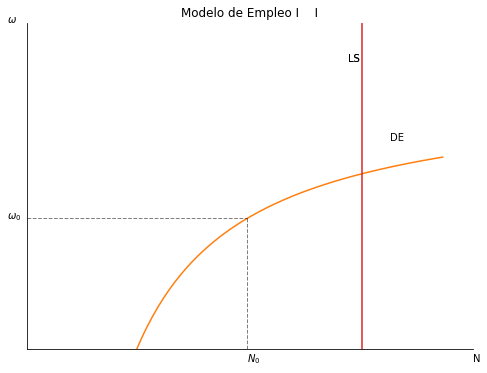

In [20]:
"GRAFICANDO"

xmin, xmax, ymin, ymax = 0, 16, 0, 0.25

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(N_0, m2_schedule, color= "C01")
ax.axvline(S_0, color = "C03")
ax.plot([N_exo, N_exo], [0, ω_exo],  c = "black", ls ='--', lw = 1, alpha = 0.5)
ax.plot([0, N_exo], [ω_exo , ω_exo], c = "black", ls ='--', lw = 1, alpha = 0.5)
ax.text(S_0 - 0.5, 0.22, "LS")
ax.text(N_0[-20], m1_schedule[-1], "DE")
ax.text(N_exo, -0.01, "$N_{0}$")
ax.text(-0.7, ω_exo, "$ω_{0}$")
ax.text(S_0 - 0.5, 0.22, "LS")
ax.text(16, -0.01, "N")
ax.text(-0.7, 0.25, "$ω$")
ax.set_title("Modelo de Empleo I    I")
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

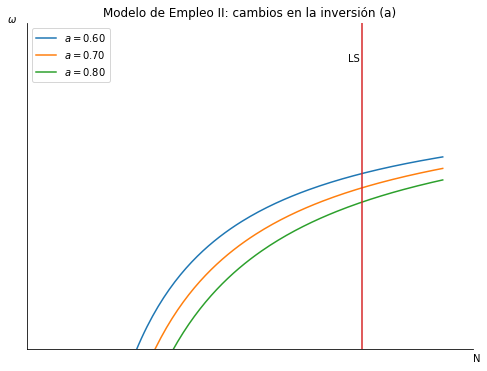

In [21]:
"Cambios en la inversión (a)"

a_shocks = (0.6, 0.7, 0.8)

xmin, xmax, ymin, ymax = 0, 16, 0, 0.25

fig, ax = plt.subplots(figsize = (8, 6))
for i in a_shocks:
    m2_a_shocks = model_2(i, b_0, cr_0, N_0)
    ax.plot(N_0, m2_a_shocks, label = r'$a=$'+f"{i:.2f}")
ax.axvline(S_0, color = "C03")
ax.text(S_0 - 0.5, 0.22, "LS")
ax.text(16, -0.01, "N")
ax.text(-0.7, 0.25, "$ω$")
ax.set_title("Modelo de Empleo II: cambios en la inversión (a)")
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.legend(loc = "upper left")
plt.show()

# Modelo de empleo III

En este modelo se considera que tanto los asalariados como los capitalistas destinan una fracción de sus ingresos para el consumo. 

$ D = c_{\omega}\omega N + c_{r}(py-\omega N) + ap  $, $ 0< c_{r},  c_{\omega} < 1 $   y   $c_{\omega} > c_{r}$

donde $c_w$ es la propensión a consumir por parte los asalariados. Nuevamente, la función de oferta agregada no varía. En equilibrio $ Z = D $: 

$ pbN = c_{\omega}\omega N + c_{r}(py-\omega N) + ap $

diviendo entre $p$ y reordeando, se deriva la función de salario real restringuido por la demanda efectiva

$ \omega_{(N)} = \frac{b(1 - c_{r})}{c_{\omega} - c_{r}} - \frac{a}{N(c_{\omega} - c_{r})} $

Nuevamente, es útil obtener  la función inversa de (). 

$ \omega_{(N)} ^{-1} = N_{(\omega)} = \frac{a}{b(1 - c_{r}) - \omega(c_{\omega} - c_{r})} $

In [22]:
"MODELO DE EMPLEO III"


def model_3(a, b, cr, cw, N):

    return b*(1 - cr)/(cw - cr) - a/(N*(cw - cr))  

def inv_model_3(a, b, cr, cw, ω):
    
    return a/(b*(1 - cr) - ω*(cw - cr))

Los parámetros deben cumplir las siguientes condiciones:

$ b - \omega > 0 $

$ 1 - c_r > 0 $

$ c_\omega - c_r > 0 $


In [23]:
"PARÁMETROS"

b_0  = 0.2
a_0  = 0.6
cr_0 = 0.24
cw_0 = 0.82
S_0  = 12
N_0  = np.arange(0.01, 15, 0.1)


In [24]:
"DEFINIENDO LA FUNCIÓN DEL MODELO 1"

m3_schedule = model_3(a_0, b_0, cr_0, cw_0, N_0)

Nuevamente, existe un grado de libertad en la función del salario real, así que se fija el salario real.

In [25]:
"EQUILIBRIO: FIJANDO EL SALARIO REAL"

ω_exo = 0.1


N_exo = inv_model_3(a_0, b_0, cr_0, cw_0, ω_exo)

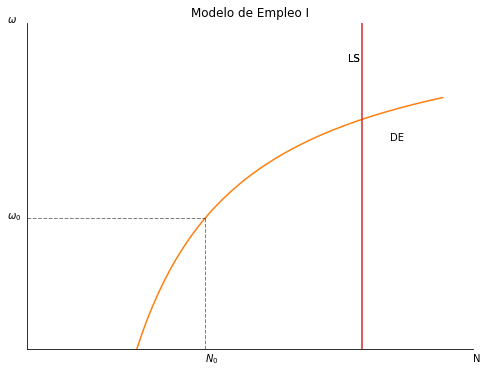

In [26]:
"GRAFICANDO"

xmin, xmax, ymin, ymax = 0, 16, 0, 0.25

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(N_0, m3_schedule, color= "C01")
ax.axvline(S_0, color = "C03")
ax.plot([N_exo, N_exo], [0, ω_exo],  c = "black", ls ='--', lw = 1, alpha = 0.5)
ax.plot([0, N_exo], [ω_exo , ω_exo], c = "black", ls ='--', lw = 1, alpha = 0.5)
ax.text(S_0 - 0.5, 0.22, "LS")
ax.text(N_0[-20], m1_schedule[-1], "DE")
ax.text(N_exo, -0.01, "$N_{0}$")
ax.text(-0.7, ω_exo, "$ω_{0}$")
ax.text(S_0 - 0.5, 0.22, "LS")
ax.text(16, -0.01, "N")
ax.text(-0.7, 0.25, "$ω$")
ax.set_title("Modelo de Empleo I")
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

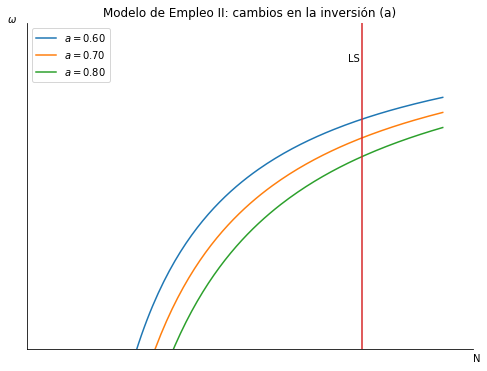

In [27]:
"Cambios en la inversión (a)"

a_shocks = (0.6, 0.7, 0.8)

xmin, xmax, ymin, ymax = 0, 16, 0, 0.25

fig, ax = plt.subplots(figsize=(8,6))
for i in a_shocks:
    m3_a_shocks = model_3(i, b_0, cr_0, cw_0, N_0)
    ax.plot(N_0, m3_a_shocks, label = r'$a=$'+f"{i:.2f}")
ax.axvline(S_0, color= "C03")
ax.text(S_0 - 0.5, 0.22, "LS")
ax.text(16, -0.01, "N")
ax.text(-0.7, 0.25, "$ω$")
ax.set_title("Modelo de Empleo II: cambios en la inversión (a)")
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.legend(loc = "upper left")
plt.show()

# Modelo de empleo IV

En este modelo se considera una función explícita para la oferta de trabajo. Se asume que la oferta de trabajo reacciona positivamente a cambios en el salario real. De esta manera, el modelo se vuelve determinado. La función lineal del salario real de la oferta de trabajo es:

$\omega_{LS} = \gamma N$,  $\gamma > 0$

donde $\gamma$ es la inversa de la sensibilidad del salario real. Por simplicidad, se emplea la función de salario real de la demanda efectiva del modelo de empleo I


$ \omega_{DE} = b - \frac{a}{N} $

De () y () se obtienen los valores de equilibrio para el salario real y el nivel de empleo. Como se verá a continuación, este modelo presenta equilibrio múltiple. 

In [28]:
"MODELO DE EMPLEO IV: FUNCIÓN DE OFERTA DE TRABAJO"


"FUNCIONES"

def model_1(a, b, N):
    
    return b - a/N

def inv_model_1(a, b, ω):
    
    return a/(b - ω)

def labor_supply(𝛾, N):

    return 𝛾*N

def inv_labor_supply(𝛾, ω):
    
    return ω/𝛾

Los parámetros tienen que cumplir las siguientes condiciones

$b - ω > 0$

$𝛾 > 0 $



In [29]:
"PARÁMETROS"

b_0 = 0.2
a_0 = 0.6
𝛾_0 = 0.012
S_0 = 12
N_0 = np.arange(0.01, 15, 0.1)

In [30]:
"DEFINIENDO LA FUNCIÓN DEL MODELO 1"

m1_schedule = model_1(a_0, b_0, N_0)
ls_schedule = labor_supply(𝛾_0, N_0)

In [31]:
"SALARIO REAL EN DESEQUILIBRIO"

ω_exo = 0.1


N_de = inv_model_1(a_0, b_0, ω_exo)
N_ls = inv_labor_supply(𝛾_0, ω_exo)

En equilibrio $\omega_{DE} = \omega_{LS}$. Por tanto,

$b - \frac{a}{N} = \gamma N$

Multiplicando ambos lados por $\frac{N}{\gamma}$ y reordeando

$N^2 -\frac{b}{\gamma}N + \frac{a}{\gamma} = 0 $

La función es cuadrática; por tanto, existen dos soluciones de la forma:

$(N-m_1)(N-m_2) = 0$

donde $m_1$ y $m_2$ son raíces de la función; en otras palabras, son los valores para el nivel de empleo en equilibrio. Solo si ambas raíces tuvieran el mismo valor, el modelo colapsaría en un único equilibrio. De esta manera, sería semejante a los anteriores modelos desarrollados. Sin embargo, si las raíces son distintas (descartando el caso de raíces imaginarias), el modelo tendría dos equilibrios. Este último caso es el  que se considera aquí.

In [32]:
"EQUILIBRIO MÚLTIPLE" 
    
def solve(a, b, c):
    
    sol1 = (- b - math.sqrt(b**2 - 4*a*c))/(2*a)
    sol2 = (- b + math.sqrt(b**2 - 4*a*c))/(2*a)
    
    return sol1, sol2

In [33]:
"EQUILIBRIO MÚLTIPLE (CONTINÚA)" 


Neq1, Neq2 = solve(1, -b_0/𝛾_0, a_0/𝛾_0)
ωeq1  = model_1(a_0, b_0, Neq1)
ωeq2  = model_1(a_0, b_0, Neq2)


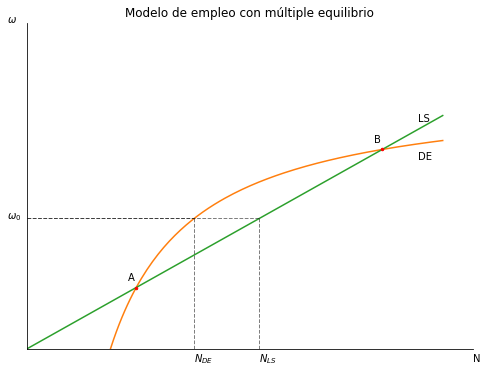

In [35]:
"GRAFICANDO"
xmin, xmax, ymin, ymax = 0, 16, 0, 0.25

fig, ax = plt.subplots(figsize = (8,6))
ax.plot(N_0, m1_schedule, color = "C01")
ax.plot(N_0, ls_schedule, color = "C02")
ax.plot([N_de, N_de], [0, ω_exo],  c  = "black", ls ='--', lw = 1, alpha = 0.5)
ax.plot([0, N_de], [ω_exo , ω_exo], c  = "black", ls ='--', lw = 1, alpha = 0.5)
ax.plot([N_ls, N_ls], [0, ω_exo],  c  = "black", ls ='--', lw = 1, alpha = 0.5)
ax.plot([0, N_ls], [ω_exo , ω_exo], c = "black", ls ='--', lw = 1, alpha = 0.5)
ax.plot(Neq1, ωeq1, color = "red", marker = ".", markersize = 5, markeredgecolor = "red")
ax.plot(Neq2, ωeq2, color = "red", marker = ".", markersize = 5, markeredgecolor = "red")
ax.text(N_0[-10], m1_schedule[-40], "DE")
ax.text(N_0[-10], ls_schedule[-5], "LS")
ax.text(N_de, -0.01, "$N_{DE}$")
ax.text(N_ls, -0.01, "$N_{LS}$")
ax.text(-0.7, ω_exo, "$ω_{0}$")
ax.text(Neq1-0.3, ωeq1 + 0.005, "A")
ax.text(Neq2-0.3, ωeq2 + 0.005, "B")
ax.text(16, -0.01, "N")
ax.text(-0.7, 0.25, "$ω$")
ax.set_title("Modelo de empleo con múltiple equilibrio")
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

En la figura se muestran los dos equilibrios. En el equilibrio B el empleo y el salario real son mayores que en el equilibrio A. Socialmente, B es un equilibrio deseable. Sin embargo, el equilibrio B es un equilibrio inestable dinámicamente. A la derecha del punto B existe un exceso de demanda de trabajo, por tanto, el salario real se presionaría al alza, alcanzando cada vez un mayor exceso de demanda de trabajo y un mayor salario real. A la izquieda del punto B existe un exceso de ofeta de trabajo, por tanto el salario se presionaría a la baja, alcanzando el equilibrio en el punto A. El equilibrio B solo se puede lograr si la economía ha estado desde siempre allí.

A diferencia del equilibrio B, el equilibrio A es un equilibrio estable dinámicamente: a la derecha o a la izquierda, las presiones a la abaja o al alza sobre el salario real producen que se alcance el equilibrio en A. Por ejemplo, como se muestra en la figura, a un salario real de desequilibrio $\omega_0$ los asalariados ofrecerían una cantidad de trabajo $N_{LS}$, mientras que lo capitalistas demandarían una cantidad de trabajo $N_{DE}$, generándose así un exceso de oferta de trabajo; luego, este exceso presiona a la baja al salario real, generando un exceso de oferta de trabajo ahora menor que, a su vez, presionaría nuevamente a la baja el salario real, así hasta alcanzar el equilibrio A.

# Referencias

Keynes, J. M. (2014). Teoría general de la ocupación, el interés y el dinero. Fondo de cultura económica. 

Lavoie, M. (2014). Post-Keynesian economics: new foundations. Edward Elgar Publishing.

Lavoie, M. (2001). Efficiency wages in Kaleckian models of employment. Journal of Post Keynesian Economics, 23(3), 449-464.

Robinson, J. (). 
